<hr style="border:2px solid black"></hr>

# Deliverables

<hr style="border:2px solid black"></hr>

<hr style="border:1px solid black"></hr>

## Business Understanding

<hr style="border:1px solid black"></hr>

The business in question is a bank that would benefit from a model that allows them to predict whether or not a potential client will open an account as well as identifying those potential customers who have not opened an account, but are likely to.

<hr style="border:1px solid black"></hr>

## Data Understanding

<hr style="border:1px solid black"></hr>

This dataset includes features for potential clients at the bank. The target for the data is a boolean value, True if the potential customer opened an account and False if they did not. There are no missing values from the dataset, so no additional cleaning is needed.

<hr style="border:1px solid black"></hr>

## Data Preparation

<hr style="border:1px solid black"></hr>

Since the data includes both numeric and non-numeric values, a column transformer with a one-hot encoder is needed to capture the impact of the non-numeric features. The numeric features are scaled using the StandardScaler from Sci-kit Learn.

<hr style="border:1px solid black"></hr>

## Modeling

<hr style="border:1px solid black"></hr>

The first step for this model is to identify which classifier (given best parameters) has the best precision score. The reason that precision score is used is because we want to be able to identify potential customers
from the list of those who have not already opened an account. The false positives of the best classifier represent those clients whom the model believe would open an account, but haven't yet.

The second step is to use the best classifier to identify those features from the data which are most important to driving a high precision score.

Finally, after selecting only the most important features, we again search for the classifier (given best parameters) which yields the best precision score.

<hr style="border:1px solid black"></hr>

## Evaluation

<hr style="border:1px solid black"></hr>

Given the analysis (below), the most important features of a potential client are: job, housing, contact, month, and poutcome.

<center>
    <img src = './images/features.png' >
</center>

---

The potential client list pulled from the false positives of the best model is below. These represent likely customers because they fit the model for being customers without having actually opened an account yet.

In [13]:
display(likely_customers)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
33898,33,management,married,tertiary,no,158,no,no,cellular,30,apr,169,2,83,2,success
34057,37,management,married,tertiary,no,57,no,no,cellular,30,apr,96,2,84,1,success
41653,53,admin.,married,secondary,no,109,no,no,telephone,30,sep,431,1,120,1,success
41659,41,management,divorced,tertiary,no,3426,no,no,cellular,1,oct,302,1,119,5,success
41665,48,management,married,tertiary,no,3842,no,no,cellular,1,oct,168,1,122,2,success
41687,26,management,single,tertiary,no,170,no,no,cellular,2,oct,160,2,109,1,success
41688,24,student,single,secondary,no,4126,no,no,cellular,2,oct,83,5,191,2,success
41729,55,unemployed,married,secondary,no,377,no,no,cellular,8,oct,403,1,183,1,success
41794,63,retired,married,primary,no,1084,no,no,cellular,14,oct,201,1,183,1,success
41830,19,student,single,primary,no,103,no,no,cellular,15,oct,96,2,97,2,success


<hr style="border:2px solid black"></hr>

# Analysis

<hr style="border:2px solid black"></hr>

<hr style="border:1px solid black"></hr>

## Import Modules

<hr style="border:1px solid black"></hr>

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,  ConfusionMatrixDisplay, RocCurveDisplay, f1_score, make_scorer
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel

pd.set_option('display.max_colwidth', None)

<hr style="border:1px solid black"></hr>

## Prepare the Smaller Data Set

<hr style="border:1px solid black"></hr>

---
### Read the Data from the Input File
---

In [2]:
bank_data = pd.read_csv('./data/bank-full.csv', sep = ';')

---
### View the Data
---

In [3]:
display(bank_data)
bank_data.info()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


---
### Separate the Target from the Data
---

In [4]:
X = bank_data.drop('y', axis = 1)
y = bank_data['y'].replace({"yes" : 1, "no" : 0})

<hr style="border:1px solid black"></hr>

## Prepare the Data Processing

<hr style="border:1px solid black"></hr>

---
### Create the Column Transformer
---

In [5]:
##----------------------------------------------------------------------------------------------------##
## Create the DataType selector:                                                                      ##
##----------------------------------------------------------------------------------------------------##

selector = make_column_selector(dtype_include = 'object')

##----------------------------------------------------------------------------------------------------##
## Create the transformer pipelines:                                                                  ##
##----------------------------------------------------------------------------------------------------##

categorical_transformer = Pipeline([
    
    ('imputer',  SimpleImputer(strategy = 'constant', fill_value = 'missing')),
    ('onehot',   OneHotEncoder(handle_unknown = 'ignore', drop = 'first'))
])

numerical_transformer = Pipeline([
    
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

##----------------------------------------------------------------------------------------------------##
## Create the column transformer   :                                                                  ##
##----------------------------------------------------------------------------------------------------##

transformer = make_column_transformer((categorical_transformer, selector), remainder = numerical_transformer)

<hr style="border:1px solid black"></hr>

## Determine the Most Important Features Using the Best Classifier

<hr style="border:1px solid black"></hr>

---
### Create a Function to get the Most Important Features
---

In [6]:
##====================================================================================================##
## Function:    feature_selection                                                                     ##
##                                                                                                    ##
## DESCRIPTION: This function is used to rank features by importance.                                 ##
##                                                                                                    ##
## INPUT(S):    1) X:                 Feature data                                                    ##
##              2) y:                 Target data                                                     ##
##              3) selectors:   List of models used during feature selection                          ##
##              4) classifier_model:  Model used during classification                                ##
##              5) classifier_params: Parameters to be used with classifier model                     ##
##              6) score_method:      Method used to generate model scores                            ##
##              7) n_runs:            Number of cross-validation re-runs                              ##
##              8) plot:              Boolean value, if true a plot of the importances is made        ##
##                                                                                                    ##
## OUTPUT(S):   1) X_return:          Streamlined feature data                                        ##
##              2) importance_df      Category importance data                                        ##
##====================================================================================================##

def feature_selection(X, y, score_method, n_runs, make_plot):

    ##------------------------------------------------------------------------------------------------##
    ## Create lists to store the best model score and features:                                       ##
    ##------------------------------------------------------------------------------------------------##

    model_features = []
    model_scores   = []

    ##------------------------------------------------------------------------------------------------##
    ## Create the model pipeline:                                                                     ##
    ##------------------------------------------------------------------------------------------------##

    selector   = LogisticRegression
    classifier = LogisticRegression
    
    pipe = Pipeline([
        ('transformer', transformer),
        ('selector', SelectFromModel(selector())),
        ('model', classifier())
    ])

    ##------------------------------------------------------------------------------------------------##
    ## Repeat the feature selection n_repeats times for cross-validation purposes:                    ##
    ##------------------------------------------------------------------------------------------------##
    
    for run in range(0, n_runs):

        ##--------------------------------------------------------------------------------------------##
        ## Split the data into training and testing subsets:                                          ##
        ##--------------------------------------------------------------------------------------------##

        X_train, X_test, y_train, y_test = train_test_split(X, y)

        ##--------------------------------------------------------------------------------------------##
        ## Fit the pipeline:                                                                          ##
        ##--------------------------------------------------------------------------------------------##
        
        pipe.fit(X_train, y_train)

        ##--------------------------------------------------------------------------------------------##
        ## Get the pipe score for this run given the chosen scoring method:                           ##
        ##--------------------------------------------------------------------------------------------##

        model_scores.append(score_method(pipe.predict(X_test), y_test))

        ##--------------------------------------------------------------------------------------------##
        ## Get the feature names:                                                                     ##
        ##--------------------------------------------------------------------------------------------##

        transformer_names = pipe['transformer'].get_feature_names_out()

        feature_names = list(pipe['selector'].get_feature_names_out(transformer_names))

        ##--------------------------------------------------------------------------------------------##
        ## Reverse feature names (thus index proxies for importance):                                 ##
        ##--------------------------------------------------------------------------------------------##

        feature_names.reverse()

        ##--------------------------------------------------------------------------------------------##
        ## Get the category names:                                                                    ##
        ##--------------------------------------------------------------------------------------------##

        category_list = list(X.columns)

        ##--------------------------------------------------------------------------------------------##
        ## Create lists for computing importance score:                                               ##
        ##--------------------------------------------------------------------------------------------##

        feature_score_list = np.zeros(len(category_list))

        remove_idx = []

        cleaned_feature_names = []

        ##--------------------------------------------------------------------------------------------##
        ## Compute importance score:                                                                  ##
        ##--------------------------------------------------------------------------------------------##

        for i in range(0, len(feature_names)):

            for j in range(0, len(category_list)):

                if (category_list[j] in feature_names[i]):

                    feature_score_list[j] += i

                    cleaned_feature_names.append(category_list[j])

                    remove_idx.append(i)
        
        ##--------------------------------------------------------------------------------------------##
        ## Detect any unused features:                                                                ##
        ##--------------------------------------------------------------------------------------------##
            
        remainder = np.delete(feature_names, remove_idx)

        if (len(remainder) > 0): print("Unclassified Features Remain!")

        ##--------------------------------------------------------------------------------------------##
        ## Count the number of times a category appears in the feature list:                          ##
        ##--------------------------------------------------------------------------------------------##
        
        count_list = []

        for i in range(0, len(category_list)):

            count_list.append(cleaned_feature_names.count(category_list[i]))

        ##--------------------------------------------------------------------------------------------##
        ## Replace 0s with 1s in count_list to avoid division by zero:                                ##
        ##--------------------------------------------------------------------------------------------##

        count_list = [x or 1 for x in count_list]

        ##----------------------------------------------------------------------------------------##
        ## Scale the category score by count_list and normalize:                                  ##
        ##----------------------------------------------------------------------------------------##

        feature_score_list /= count_list

        feature_score_list /= np.max(feature_score_list)

        model_features.append(feature_score_list)

    ##------------------------------------------------------------------------------------------------##
    ## Get the best features for the current model based on the chosen scoring method:                ##
    ##------------------------------------------------------------------------------------------------##

    importance_df = pd.DataFrame({"Category" : X.columns})
    importance_df.set_index("Category", inplace = True)

    importance_df["Score"] = 0

    for run in range(0, n_runs):

        importance_df["Score"] += model_features[run] / n_runs

    importance_df["Score"] /= importance_df["Score"].max()

    importance_df.sort_values("Score", ascending = False, inplace = True)

    ##------------------------------------------------------------------------------------------------##
    ## If desired, create a plot of the feature importances:                                          ##
    ##------------------------------------------------------------------------------------------------##

    if (make_plot == True):

        figure = plt.figure(figsize = (12, 4))

        graph_1 = figure.add_axes([0.0, 0.0, 1.0, 1.0])

        graph_2 = figure.add_axes([1.1, 0.0, 0.3, 1.0])

        graph_2.axis('off')

        bbox = [0, 0, 1, 1]

        score_table = graph_2.table(cellText = np.round(importance_df.values, 5), \
                                    rowLabels = importance_df.index, bbox = bbox, \
                                    colLabels = importance_df.columns)

        graph_1.set_title('Category Importance using Regression Feature Selection')

        importance_df["Score"].plot.bar(ax = graph_1)

        graph_1.set_xlabel('')

        graph_1.set_ylabel('Relative Importance')

        graph_1.tick_params(axis='x', rotation = 45)

        graph_1.grid()

        plt.show()

    ##------------------------------------------------------------------------------------------------##
    ## Create the streamlined feature data:                                                           ##
    ##------------------------------------------------------------------------------------------------##

    drop_list = list(importance_df.query("Score < 0.01").index)

    X_return = X.drop(drop_list, axis = 1)

    if (make_plot == True): display(X_return.head())

    ##------------------------------------------------------------------------------------------------##
    ## Return the streamlined feature data and the category importance data:                          ##
    ##------------------------------------------------------------------------------------------------##

    return X_return, importance_df

---
### Get the Most Important Features Using the Best Classifier
---

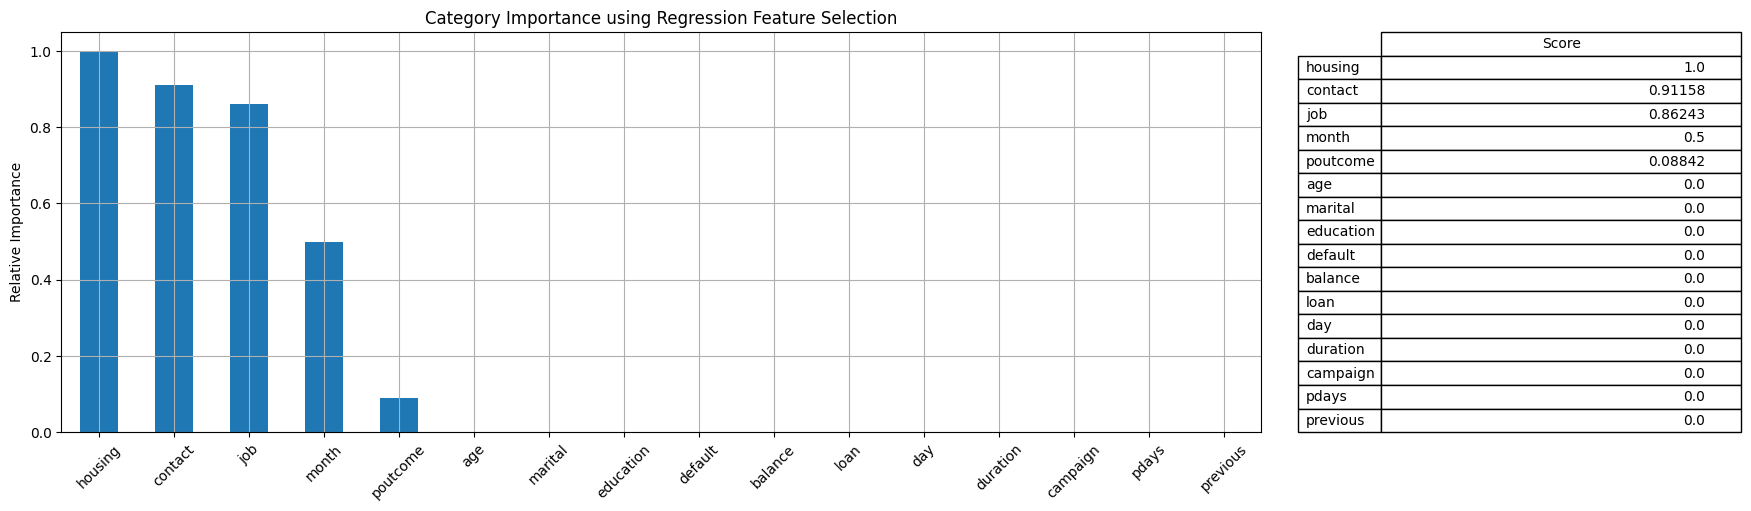

,job,housing,contact,month,poutcome
0,management,yes,unknown,may,unknown
1,technician,yes,unknown,may,unknown
2,entrepreneur,yes,unknown,may,unknown
3,blue-collar,yes,unknown,may,unknown
4,unknown,no,unknown,may,unknown


In [7]:
X2, category_importance_df = feature_selection(X, y, precision_score, 25, True)

<hr style="border:1px solid black"></hr>

## Find the Best Model

<hr style="border:1px solid black"></hr>

---
### Create Function to Find Best Model Parameters
---

In [8]:
##====================================================================================================##
## Function:    model_grid_search                                                                     ##
##                                                                                                    ##
## DESCRIPTION: This function conducts a grid search of a model given a set of parameters.            ##
##                                                                                                    ##
## INPUT(S):    1) X:           Fitting data array                                                    ##
##              2) y:           Target data  array                                                    ##
##              3) transformer: Column transformer                                                    ##
##              4) parameters:  List of grid search parameters                                        ##
##              5) scorer:      Type of scoring to be used                                            ##
##              6) n_cv:        Number of cross-validations to perform                                ##
##                                                                                                    ##
## OUTPUT(S):   1) best_params: Parameters for the best estimator from the grid search                ##
##              2) score_list:  List of accuracy, precision, recall, F1 score of best estimator       ##
##              3) predictions: DataFrame with model predictions                                      ##
##====================================================================================================##

def model_grid_search(X, y, transformer, parameters, scorer, n_cv):

    print("Running " + parameters[0] + " Grid Search.\n")

    ##------------------------------------------------------------------------------------------------##
    ## Get the initial time:                                                                          ##
    ##------------------------------------------------------------------------------------------------##

    t_initial = time.time()

    ##------------------------------------------------------------------------------------------------##
    ## Get the classifer:                                                                             ##
    ##------------------------------------------------------------------------------------------------##

    classifier = parameters[1]

    ##------------------------------------------------------------------------------------------------##
    ## Create the Pipeline:                                                                           ##
    ##------------------------------------------------------------------------------------------------##

    pipe = Pipeline([
    
        ('transformer', transformer),
        ('model',       classifier())
    ])
    
    ##------------------------------------------------------------------------------------------------##
    ## Create the GridSearchCV object:                                                                ##
    ##------------------------------------------------------------------------------------------------##

    cross_validation = StratifiedKFold(n_splits = n_cv)

    new_scorer = make_scorer(scorer, zero_division = 0)

    grid = GridSearchCV(pipe, param_grid = parameters[2], cv = cross_validation, scoring = new_scorer)

    ##------------------------------------------------------------------------------------------------##
    ## Fit the Grid on the training data:                                                             ##
    ##------------------------------------------------------------------------------------------------##

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

    grid.fit(X_train, y_train)

    ##------------------------------------------------------------------------------------------------##
    ## Get the best parameters from the search:                                                       ##
    ##------------------------------------------------------------------------------------------------##

    best_params = grid.best_params_

    print("Best Parameters: " + str(best_params))

    ##------------------------------------------------------------------------------------------------##
    ## Get the best estimator scores:                                                                 ##
    ##------------------------------------------------------------------------------------------------##

    best_estimator = grid.best_estimator_

    predictions = best_estimator.predict(X_test)
    
    accuracy   = accuracy_score(y_test, predictions)
    
    precision  = precision_score(y_test, predictions)
    
    recall     = recall_score(y_test, predictions)
    
    f1         = f1_score(y_test, predictions)

    score_list = [accuracy, precision, recall, f1]

    ##------------------------------------------------------------------------------------------------##
    ## Get the final time and print search time:                                                      ##
    ##------------------------------------------------------------------------------------------------##

    t_final = time.time()

    print("Search conducted in: " + str(np.round(t_final - t_initial, 2)) + " seconds.\n\n")

    ##------------------------------------------------------------------------------------------------##
    ## Create a list of false-positive potential customers from best estimator:                       ##
    ##------------------------------------------------------------------------------------------------##
    
    predictions = grid.best_estimator_.predict(X)

    predictions_df = X.copy()
    
    predictions_df["Actual"]     = y
    predictions_df["Prediction"] = predictions

    #potential_customers = predictions_df.query("Actual == 0 and Prediction == 1")

    #potential_customers.reset_index(inplace = True)

    #potential_customers_df = potential_customers.rename(columns ={"index" : "Original Customer Index"})
    
    ##------------------------------------------------------------------------------------------------##
    ## Return the best parameters, best estimator scores, and potential customer list:                ##
    ##------------------------------------------------------------------------------------------------##
    
    return best_params, score_list, predictions_df

##====================================================================================================##
## End Function: model_grid_search                                                                    ##
##====================================================================================================##

---
### Create the Search Grid Parameter Lists
---

In [9]:
##----------------------------------------------------------------------------------------------------##
## K-Nearest Neighbors Parameters:                                                                    ##
##----------------------------------------------------------------------------------------------------##

knn_params = [
    "K-Nearest Neighbor", KNeighborsClassifier,
    {
     'model__n_neighbors' : [4], # range(3, 6, 1),
     'model__weights'     : ['uniform'] # ['uniform', 'distance']
    }
]

##----------------------------------------------------------------------------------------------------##
## Logistic Regression Parameters:                                                                    ##
##----------------------------------------------------------------------------------------------------##

lgr_params = [
    "Logistic Regression", LogisticRegression,
    {
     'model__fit_intercept' : [False],  # [True, False],
     'model__C'             : [0.001],  # np.logspace(-6, -3, num = 7),
     'model__solver'        : ['lbfgs'] # ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky']
    }
]

##----------------------------------------------------------------------------------------------------##
## Decision Tree Parameters:                                                                          ##
##----------------------------------------------------------------------------------------------------##

dtr_params = [
    "Decision Tree Classifier", DecisionTreeClassifier,
    {
     'model__criterion'         : ['log_loss'], # ['gini', 'entropy', 'log_loss'],
     'model__max_depth'         : [5], # [None, 2, 5, 10, 20],
     'model__min_samples_split' : [3] # [2, 3, 4]
    }
]

##----------------------------------------------------------------------------------------------------##
## Support Vector Machine Parameters:                                                                 ##
##----------------------------------------------------------------------------------------------------##

svm_params = [
    "Support Vector Machine", SVC,
    {
     'model__C'      : [0.1], # [0.01, 0.1, 1],
     'model__kernel' : ['poly'], # ['rbf', 'poly', 'sigmoid'],
     'model__gamma'  : ['scale'], # ['scale', 'auto']
     'model__degree' : [4] # [3, 4, 5]
    }
]

---
### Perform a Grid Search to get the Best Classifier on the Reduced Data
---

In [10]:
##----------------------------------------------------------------------------------------------------##
## Create the list of search parameters:                                                              ##
##----------------------------------------------------------------------------------------------------##

params_list      = [knn_params, lgr_params, dtr_params, svm_params]

##----------------------------------------------------------------------------------------------------##
## Create the lists to store outputs of searches:                                                     ##
##----------------------------------------------------------------------------------------------------##

best_params_list = []

score_list       = []

customer_list    = []

##----------------------------------------------------------------------------------------------------##
## Perform a grid search for each model:                                                              ##
##----------------------------------------------------------------------------------------------------##

for i in range(0, len(params_list)):

    params, score, customers = model_grid_search(X2, y, transformer, params_list[i], precision_score, 2)

    best_params_list.append(params)

    score_list.append(score)

    customer_list.append(customers)

##----------------------------------------------------------------------------------------------------##
## Create a DataFrame containing the best estimator parameters:                                       ##
##----------------------------------------------------------------------------------------------------##

search_df = pd.DataFrame({
    
    "Model"           : [a[0] for a in params_list],
    "Best Parameters" : best_params_list,
    "Accuracy"        : [a[0] for a in score_list],
    "Precision"       : [a[1] for a in score_list],
    "Recall"          : [a[2] for a in score_list],
    "F1 Score"        : [a[3] for a in score_list]
})

display(search_df)

Running K-Nearest Neighbor Grid Search.

Best Parameters: {'model__n_neighbors': 4, 'model__weights': 'uniform'}
Search conducted in: 9.52 seconds.


Running Logistic Regression Grid Search.

Best Parameters: {'model__C': 0.001, 'model__fit_intercept': False, 'model__solver': 'lbfgs'}
Search conducted in: 0.32 seconds.


Running Decision Tree Classifier Grid Search.

Best Parameters: {'model__criterion': 'log_loss', 'model__max_depth': 5, 'model__min_samples_split': 3}
Search conducted in: 0.31 seconds.


Running Support Vector Machine Grid Search.

Best Parameters: {'model__C': 0.1, 'model__degree': 4, 'model__gamma': 'scale', 'model__kernel': 'poly'}
Search conducted in: 26.72 seconds.




,Model,Best Parameters,Accuracy,Precision,Recall,F1 Score
0,K-Nearest Neighbor,"{'model__n_neighbors': 4, 'model__weights': 'uniform'}",0.885783,0.545213,0.154717,0.241035
1,Logistic Regression,"{'model__C': 0.001, 'model__fit_intercept': False, 'model__solver': 'lbfgs'}",0.885694,0.613793,0.067170,0.121088
2,Decision Tree Classifier,"{'model__criterion': 'log_loss', 'model__max_depth': 5, 'model__min_samples_split': 3}",0.890295,0.610390,0.177358,0.274854
3,Support Vector Machine,"{'model__C': 0.1, 'model__degree': 4, 'model__gamma': 'scale', 'model__kernel': 'poly'}",0.889764,0.678733,0.113208,0.194049


---
### Determine The Best Potential Customer List
---

In [11]:
##----------------------------------------------------------------------------------------------------##
## Calculate the model weights based on precision score:                                              ##
##----------------------------------------------------------------------------------------------------##

precision_average = search_df["Precision"].mean()

weights = search_df["Precision"] / precision_average

##----------------------------------------------------------------------------------------------------##
## Get the predictions from the models:                                                               ##
##----------------------------------------------------------------------------------------------------##

predictions = pd.DataFrame({"KNN" : customer_list[0]["Prediction"],
                            "LGR" : customer_list[1]["Prediction"],
                            "DTC" : customer_list[2]["Prediction"],
                            "SVM" : customer_list[3]["Prediction"]
                           })

##----------------------------------------------------------------------------------------------------##
## Replace 0s with -1s and multiply by weights:                                                       ##
##----------------------------------------------------------------------------------------------------##

predictions["KNN"] = [-1 * weights[0] if a == 0 else a * weights[0] for a in predictions["KNN"]]
predictions["LGR"] = [-1 * weights[1] if a == 0 else a * weights[1] for a in predictions["LGR"]]
predictions["DTC"] = [-1 * weights[2] if a == 0 else a * weights[2] for a in predictions["DTC"]]
predictions["SVM"] = [-1 * weights[3] if a == 0 else a * weights[3] for a in predictions["SVM"]]

##----------------------------------------------------------------------------------------------------##
## Get the hybrid prediction:                                                                         ##
##----------------------------------------------------------------------------------------------------##

predictions["Hybrid"] = predictions["KNN"] + predictions["LGR"] + predictions["DTC"] + predictions["SVM"]

predictions["Actual"] = y

predictions["Hybrid"] = [0 if a <= 2.5 else 1 for a in predictions["Hybrid"]]

hybrid_precision = precision_score(y, predictions["Hybrid"])

print("Hybrid Model Precision: " + str(np.round(hybrid_precision, 3)))

##----------------------------------------------------------------------------------------------------##
## Get list of likely customers from the false positives of the hybrid model:                         ##
##----------------------------------------------------------------------------------------------------##

false_positives = predictions.query("Hybrid == 1 and Actual == 0")

fp_index = false_positives.index

likely_customers = X.iloc[fp_index]

display(likely_customers)

Hybrid Model Precision: 0.821


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
33898,33,management,married,tertiary,no,158,no,no,cellular,30,apr,169,2,83,2,success
34057,37,management,married,tertiary,no,57,no,no,cellular,30,apr,96,2,84,1,success
41653,53,admin.,married,secondary,no,109,no,no,telephone,30,sep,431,1,120,1,success
41659,41,management,divorced,tertiary,no,3426,no,no,cellular,1,oct,302,1,119,5,success
41665,48,management,married,tertiary,no,3842,no,no,cellular,1,oct,168,1,122,2,success
41687,26,management,single,tertiary,no,170,no,no,cellular,2,oct,160,2,109,1,success
41688,24,student,single,secondary,no,4126,no,no,cellular,2,oct,83,5,191,2,success
41729,55,unemployed,married,secondary,no,377,no,no,cellular,8,oct,403,1,183,1,success
41794,63,retired,married,primary,no,1084,no,no,cellular,14,oct,201,1,183,1,success
41830,19,student,single,primary,no,103,no,no,cellular,15,oct,96,2,97,2,success
